In [12]:
import cv2;
import face_recognition
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
from keras.models import load_model

In [36]:
# face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml');

images = []
video = cv2.VideoCapture(0);

while True:
    faces = []
    check, frame = video.read();
#     faces = face_cascade.detectMultiScale(frame,
#                                           scaleFactor=1.1, minNeighbors=5);
    face_locations = face_recognition.face_locations(frame)
    for top, right, bottom, left in face_locations:
        frame = cv2.rectangle(frame, (left,bottom), (right,top), (0,255,0), 3);
        face = frame[top:bottom, left:right]
        face_gray = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
        faces.append(face_gray)
#     for x,y,w,h in faces:
#          frame = cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 3);
    images.append(faces)
    cv2.imshow('Face Detector', frame);
    
    if len(images) >= 10:
        break

    key = cv2.waitKey(1);

    if key == ord('q'):
        break;

video.release();
cv2.destroyAllWindows();

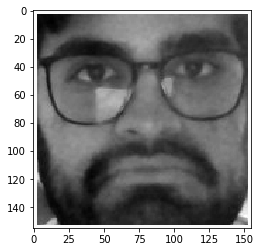

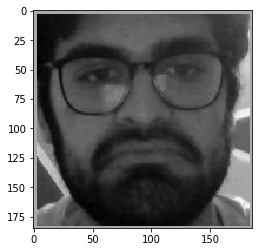

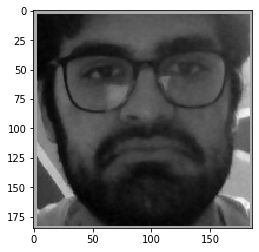

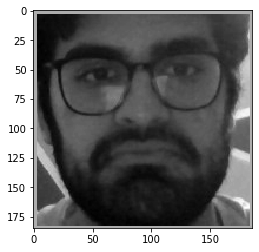

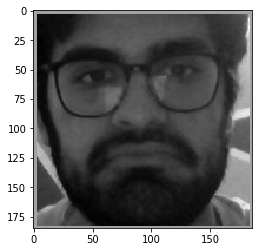

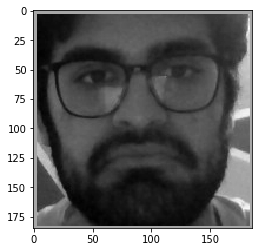

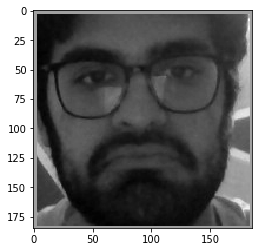

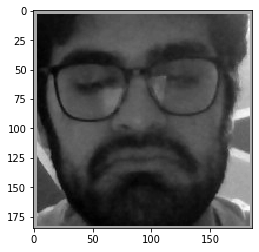

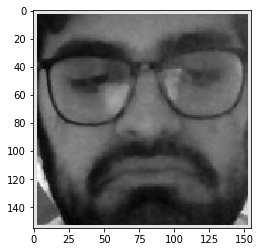

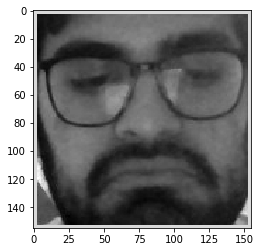

In [27]:
for faces in images:
    encoding = []
    for face in faces:
        plt.imshow(face, cmap='gray')
        plt.show()

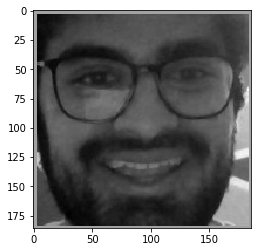

In [37]:
image_save = Image.fromarray(images[9][0])
image_save.save("face.jpg")
plt.imshow(images[9][0], cmap='gray')
plt.show()

In [38]:
face = face_recognition.load_image_file("face.jpg")
encoding_face = face_recognition.face_encodings(face)

In [39]:
emotion_dict= {'Angry': 0, 'Sad': 5, 'Neutral': 4, 'Disgust': 1, 'Surprise': 6, 'Fear': 2, 'Happy': 3}

In [44]:
face  = cv2.imread("face.jpg")
face_resize = cv2.resize(face,(48,48))
face_resize = np.reshape(face_resize, (1, 48, 48, 3))
model = load_model('my_model.hdf5')

In [45]:
%%time
predicted_class = np.argmax(model.predict(face_resize))
label_map = dict((v,k) for k,v in emotion_dict.items()) 
predicted_label = label_map[predicted_class]
predicted_label

Wall time: 521 ms


'Neutral'

In [42]:
face_image  = cv2.imread("face.jpg")
face_image = cv2.resize(face_image, (48,48))
face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
face_image = np.reshape(face_image, [1, face_image.shape[0], face_image.shape[1], 1])

model = load_model("model_v6_23.hdf5")

predicted_class = np.argmax(model.predict(face_image))
label_map = dict((v,k) for k,v in emotion_dict.items()) 
predicted_label = label_map[predicted_class]
predicted_label

'Fear'